In [30]:
import pandas as pd
import json
from matplotlib import pyplot as plt

In [31]:
with open("results.json", "r") as f:
    data = json.load(f)
    
print(data[0])

{'layers': 'linear,linear', 'branching factor': 512, 'average error': 708401.5625, 'average error %': 1.9659395, 'max error': 3931879, 'max error %': 1.9659395, 'size binary search': 69760, 'size linear search': 65664}


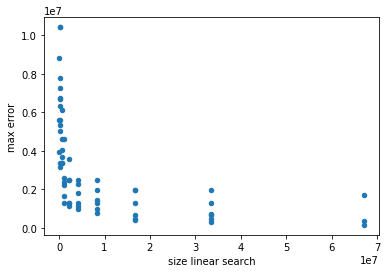

In [32]:
df = pd.DataFrame(data)
df.plot.scatter("size linear search", "max error")

In [66]:
mask = []
for idx1, el1 in df.iterrows():
    my_size = el1["size linear search"]
    my_error = el1["max error"]
    for idx2, el2 in df.iterrows():
        if idx1 == idx2:
            continue
            
        if (el2["size linear search"] <= my_size) and (el2["max error"] <= my_error):
            mask.append(False)
            break
    else:
        mask.append(True)

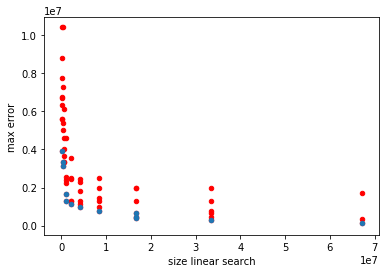

In [67]:
ax = df.plot.scatter("size linear search", "max error", color="red")
df[mask].plot.scatter("size linear search", "max error", ax=ax)
plt.show()

In [68]:
df[mask].sort_values("size linear search")

,layers,branching factor,average error,average error %,max error,max error %,size binary search,size linear search
0,"linear,linear",512,708401.562500,1.965939,3931879,1.965939,69760,65664
32,"bradix,linear",2048,524288.000000,1.683031,3366062,1.683031,278720,262336
51,"cubic,cubic",1024,700951.062500,1.576935,3153871,1.576935,270592,262400
4,"linear,linear",8192,131072.000000,0.825524,1651049,0.825524,1114240,1048704
34,"bradix,linear",8192,242531.000000,0.640173,1280346,0.640173,1114304,1048768
54,"cubic,cubic",8192,215455.781250,0.564657,1129314,0.564657,2162944,2097408
36,"bradix,linear",32768,55305.210938,0.493501,987001,0.493501,4456640,4194496
56,"cubic,cubic",32768,58236.359375,0.375388,750776,0.375388,8651008,8388864
47,"radix,cubic",65536,64985.792969,0.340148,680296,0.340148,17301632,16777344
38,"bradix,linear",131072,27853.195312,0.235951,471902,0.235951,17825984,16777408
